# INTRO TO AGENT TORCH


## Example use case : Neural Cellular Automata

In this tutorial, we will explore how to train a Neural Cellular Automata (NCA) model using PyTorch. Cellular Automata (CA) are discrete models studied in computer science, mathematics, physics, complexity science, and theoretical biology. NCAs are a type of CA that use neural networks for their update rules.

The tutorial will guide you through the process of setting up the training environment, initializing the NCA model, and running the training process. We will also discuss how to interpret the output and evaluate the performance of the trained model.

Let's get started!

### Define the simulation metadata

#### Generating `config.yaml` file

You interface with the framework using a config.yaml file. This can be edited directly or can be edited programatically using the `configure_nca` method.
Here we use configure_nca to generate config.yaml


Through a dictionary like `params` we can set the metadata for our experiments.

##### Parameters Dictionary

The `params` dictionary contains configuration parameters for the model. Here's a brief description of each key-value pair:

- `num_episodes`: The total number of episodes for the model to run. Default is `150000`.
- `num_steps_per_episode`: The number of steps per episode. Default is `5`.
- `num_substeps_per_step`: The number of substeps per step. Default is `1`.
- `w`: The width of the model grid. Default is `48`.
- `h`: The height of the model grid. Default is `48`.
- `n_channels`: The number of channels in the model. Default is `16`.
- `batch_size`: The size of the batch for the model. Default is `8`.
- `hidden_size`: The size of the hidden layer in the model. Default is `128`.
- `device`: The device to run the model on. Default is `"cpu"`.
- `fire_rate`: The fire rate of the model. Default is `0.5`.
- `angle`: The angle for the model. Default is `0.0`.
- `learning_params`: A dictionary containing learning parameters for the model. It includes:
  - `lr`: The learning rate. Default is `2e-3`.
  - `betas`: The betas for the Adam optimizer. Default is `[0.5, 0.5]`.
  - `lr_gamma`: The learning rate gamma. Default is `0.9999`.
  - `model_path`: The path to save the model. Default is `"saved_model.pth"`.
- `angle_chn`: The angle channel for the model. Default is `0`.
- `chn`: The number of channels for the model. Default is `16`.
- `scalar_chn`: The scalar channel for the model. Default is `16`.
- `update_rate`: The update rate for the model. Default is `0.5`.
- `seed_size`: The seed size for the model. Default is `1`.
- `pool_size`: The pool size for the model. Default is `128`.
- `target`: The target for the model. Default is `"heart"`.
- `aux_l_type`: The auxiliary loss type for the model. Default is `"binary"`.
- `model_type`: The type of the model. Default is `"laplacian"`.
- `mirror`: Whether to mirror the model or not. Default is `False`.
- `alive_threshold_value`: The alive threshold value for the model. Default is `0.1`.
- `hex_grid`: Whether to use a hexagonal grid or not. Default is `False`.

In [2]:
params = {
    "num_episodes": 150000,
    "num_steps_per_episode": 5,
    "num_substeps_per_step": 1,
    "w": 48,
    "h": 48,
    "n_channels": 16,
    "batch_size": 8,
    "hidden_size": 128,
    "device": "cpu",
    "fire_rate": 0.5,
    "angle": 0.0,
    "learning_params": {
        "lr": 2e-3,
        "betas": [0.5, 0.5],
        "lr_gamma": 0.9999,
        "model_path": "saved_model.pth"
    },
    "angle_chn": 0,
    "chn": 16,
    "scalar_chn": 16,
    "update_rate": 0.5,
    "seed_size": 1,
    "pool_size": 128,
    "target": "heart",
    "aux_l_type": "binary",
    "model_type": "laplacian",
    "mirror": False,
    "alive_threshold_value": 0.1,
    "pool_size": 128,
    "hex_grid": False,
    "trainable_transition_network": True
    }

In [4]:
import sys
sys.path.append("/Users/shashankkumar/Documents/AgentTorchLatest/AgentTorch")   #path to AgentTorch
from models.nca.simulator import configure_nca
#define the config file path
config_file = "/Users/shashankkumar/Documents/AgentTorchLatest/AgentTorch/models/nca/config.yaml"
config, registry = configure_nca(config_file,params)

/Users/shashankkumar/anaconda3/envs/torch38/lib/python3.8/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/Users/shashankkumar/anaconda3/envs/torch38/lib/python3.8/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling tor

### Runner Initialisation

We can now simply pass the `config, registry` to a class which inherits from Runner class. In our example we have `NCARunnerWithPool`, it is defined in the `simulator.py` file

The `NCARunnerWithPool` class is a subclass of the `Runner` class. It is used to manage the state of a Neural Cellular Automata (NCA) during simulation and training.


- `__init__(self, *args, **kwargs)`: Initializes the `NCARunnerWithPool` class.

- `_nca_initialize_state(self, seed_size, i, len_loss)`: Initializes the state of the NCA, seeds the pool if it's `None`, and augments the input.

- `augment_input(self, i, len_loss, x0)`: Augments the input state `x0` based on the current iteration `i` and the length of the loss `len_loss`.

- `seed(self, pool_size, seed_size)`: Creates a seed state with a given `pool_size` and `seed_size`.

- `reset(self, seed_size=1, i=0, len_loss=0)`: Resets the state of the NCA.

- `update_pool(self, x)`: Updates the pool with a new state `x`, replacing the states at the batch indices.

In [7]:
from AgentTorch.helpers.general import read_config
from models.nca.simulator import NCARunner

runner = NCARunner(read_config(config_file), registry)
runner.init()

resolvers already registered..
Simulator done..
Simulator initialization done..
perc_n: 32 hidden_n: 192
initialization complete..


/Users/shashankkumar/Documents/AgentTorchLatest/AgentTorch/AgentTorch/helpers/environment.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = torch.tensor(nx.adjacency_matrix(G).todense())


The initialization phase of our simulation process is now complete. All necessary configurations and functions required for the execution of our simulation have been encapsulated within the `runner` object. 

The `runner` object serves as the primary driver of our simulation, responsible for executing the sequential steps that constitute the training process.

### Training

This Python script contains the `TrainNca` class, which is used for training a Neural Cellular Automata (NCA) model. 

##### Class Initialization

The `TrainNca` class is initialized with the following parameters:

- `runner`: An instance of the `NCARunnerWithPool` class, which is used to run the NCA simulation.
- `custom_loss_fn`: A custom loss function for training the NCA model. If not provided, the `InvariantLoss` function is used by default.
- `target`: The target pattern for the NCA model to learn. If not provided, a target is generated using the `AddAuxilaryChannel` class.
- `aux_target`: An auxiliary target pattern for the NCA model to learn. If not provided, an auxiliary target is generated using the `AddAuxilaryChannel` class.

##### Class Methods

The `TrainNca` class contains the following methods:

- `train`: This method starts the training process of the NCA model. It iterates over a specified number of episodes, and for each episode, it performs a training step and saves the model's state.

- `train_step`: This method performs a single training step. It resets the runner, performs a specified number of steps in the NCA simulation, calculates the loss, performs backpropagation, updates the model's parameters, and saves the output.

- `calculate_loss`: This method calculates the loss for a training step. If a custom loss function is provided, it is used to calculate the loss. 

- `save_output`: This method saves the output of a training step. It also plots the loss curve, logs the loss curve and output images to wandb, and saves the model's state.

In the `TrainNca` class, several variables are used to configure the training process and the Neural Cellular Automata (NCA) model. Here is a brief description of these variables:

- `target`: The target image for the NCA. Possible values include 'circle', 'lizard', 'heart', 'smiley', 'lollipop', 'unicorn', 'spiderweb'.
  
- `auxl_type`: The type of auxiliary channel. Possible values include 'noaux', 'binary', 'minimal', 'extended'.
  
- `model_type`: The type of the perception model to use. Possible values include 'laplacian', 'lap6', 'lap gradnorm', 'steerable', 'gradient', 'steerable nolap'.
  
- `alive_threshold`: The value above which a cell will be considered alive. The default value is 0.1.
  
- `chn`: The number of channels. The default value is 16.
  
- `angle_chn`: A boolean value indicating if there is a channel for angle or not. The default value is False.
  
- `w/h`: The width and height of the grid. The default value is 72.
  
- `hex_grid`: A boolean value indicating whether to use a hexagonal grid. The behavior is fixed but can be changed in `TrainNCA`. It is set to true if the model type is 'lap6'.
  
- `Kernel Used for Perception`: The kernel used for perception. New kernels can be added in the initialization of `IsoNCAOps` contained inside `utils.py`. Possible values include 'Identical', 'Sobel', 'Laplacian', 'Lap6', 'Gaussian'.

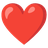

torch.Size([1, 72, 72])


/Users/shashankkumar/Documents/AgentTorchLatest/AgentTorch/models/nca/substeps/utils.py:300: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  self.angle = a = torch.range(0, self.W*np.pi,device=self.device)/(self.W/2)
/Users/shashankkumar/anaconda3/envs/torch38/lib/python3.8/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


KeyError: 'trainable_transition_network'

In [8]:
from models.nca.trainer_nca import TrainNca

trainer = TrainNca(runner)
trainer.train()

### Summary
##### We have now seen a simple example of training a NCA with AgentTorch. We can summarise the steps as :
1) Define the simulation metadata
2) Generate the config.yaml file
3) Initialise the runner
4) Train the model

In [ ]:
config_file = "/Users/shashankkumar/Documents/AgentTorchLatest/AgentTorch/models/nca/config.yaml"
    
params = {
"num_episodes": 150000,
"num_steps_per_episode": 5,
"num_substeps_per_step": 1,
"w": 48,
"h": 48,
"n_channels": 16,
"batch_size": 8,
"hidden_size": 128,
"device": "cpu",
"fire_rate": 0.5,
"angle": 0.0,
"learning_params": {
    "lr": 2e-3,
    "betas": [0.5, 0.5],
    "lr_gamma": 0.9999,
    "model_path": "saved_model.pth"
},
"angle_chn": 0,
"chn": 16,
"scalar_chn": 16,
"update_rate": 0.5,
"seed_size": 1,
"pool_size": 128,
"target": "heart",
"aux_l_type": "binary",
"model_type": "laplacian",
"mirror": False,
"alive_threshold_value": 0.1,
"pool_size": 128,
"hex_grid": False
}

config, registry = configure_nca(config_file,params)
runner = NCARunnerWithPool(read_config(config_file), registry)

runner.init()
trainer = TrainNca(runner)
trainer.train()

### How to provide custom networks for Observation, Action and Transition steps

Lets see how we can experiment with different transition networks

In [ ]:
import torch

config_values = {
    'n_channels': 16 
}
#define the custom network
custom_network = torch.nn.Sequential(
    torch.nn.Conv2d(config_values['n_channels'], config_values['n_channels'], 1),
    torch.nn.ReLU(),
    torch.nn.Conv2d(config_values['n_channels'], config_values['n_channels'], 1, bias=False)
)
config,registry = configure_nca(config_file,params,custom_transition_network=custom_network)
#rest of the steps remain same

To define a custom observation/action network we follow similar procedure, but we need to do one extra step.
  
  In the `simulator.py`, use `@set_custom_observation_network_factory/@set_custom_action_network_factory` on the class you want to modify

Lets see how can pass the custom network to our desired observation or action class

In [ ]:
from AgentTorch.AgentTorch.utils import set_custom_action_network_factory
from substeps.evolve_cell.action import GenerateStateVector

@set_custom_action_network_factory(custom_action_network[0])
    class CustomGenerateStateVector(GenerateStateVector):
        pass
generate_state_vector =  conf.create_function(GenerateStateVector, input_variables={'cell_state': f'agents/{active_agent}/cell_state'}, output_variables=['StateVector'], fn_type="policy")


### Overriding Runner methods

There is an utility function named `assign_method`, which can be used to override the methods of `runner` object. Define a function and call the assign method function with name of method you want to override

In [ ]:
from AgentTorch.models.nca.substeps.utils import assign_method

def reset_new(self, seed_size=1, i=0, len_loss=0):
        x0 = self._nca_initialize_state(seed_size, i, len_loss)
        self.state = self.initializer.state
        self.state['agents']['automata']['cell_state'] = x0
runner = NCARunnerWithPool(read_config(config_file), registry)
assign_method(runner, 'reset', reset_new)


### Running Multiple Experiments

In [5]:
from AgentTorch.AgentTorch.utils import create_dicts_list

params = {
    "num_episodes": 150000,
    "num_steps_per_episode": 5,
    "num_substeps_per_step": 1,
    "w": 48,
    "h": 48,
    "n_channels": [16,20,23],
    "batch_size": 8,
    "hidden_size": 128,
    "device": "cpu",
    "fire_rate": 0.5,
    "angle": 0.0,
    "learning_params": {
        "lr": 2e-3,
        "betas": [0.5, 0.5],
        "lr_gamma": 0.9999,
        "model_path": "saved_model.pth"
    },
    "angle_chn": 0,
    "chn": 16,
    "scalar_chn": 16,
    "update_rate": 0.5,
    "seed_size": 1,
    "pool_size": 128,
    "target": "heart",
    "aux_l_type": "binary",
    "model_type": "laplacian",
    "mirror": False,
    "alive_threshold_value": 0.1,
    "pool_size": 128,
    "hex_grid": False,
    "trainable_transition_network" : True
    }

dict_list = create_dicts_list(params)
config_file = "/Users/shashankkumar/Documents/AgentTorchLatest/AgentTorch/models/nca/config.yaml"
for dicts in dict_list:
    print(dicts)
    config, registry = configure_nca(config_file,dicts)
    runner = NCARunnerWithPool(read_config(config_file), registry)

    runner.init()
    trainer = TrainNca(runner)
    trainer.train()

### Transfer Learning

It is equivalent to providing a custom transition network

In [ ]:
import torch

#define params dictionary
params = {...}
#load the model
model = torch.load("saved_model.pth")
#Freeze or add layers as needed
# for param in model.parameters():
#     if param.name in ['layer1', 'layer2']:
#         param.requires_grad = False
config,registry = configure_nca(config_file,params,custom_transition_network=model)
runner = NCARunnerWithPool(read_config(config_file), registry)
runner.init()
trainer = TrainNca(runner)
trainer.train()